In [19]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline
# this is a new library you haven't seen before, what do you think it does? 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

<img src="http://www.nature.com/article-assets/npg/srep/2015/150825/srep13285/images/w926/srep13285-f4.jpg" width="300" height="300" />

From this article in [Scientific Reports](http://www.nature.com/articles/srep13285)

#### Read in the data
* elemental data: [https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/atomsradii.csv](https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/atomsradii.csv)
* testing data: [https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/testing.csv](https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/testing.csv)

In [2]:
d1 = pd.read_csv('https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/atomsradii.csv')

Take 1-2 min and look @ the data in elements using pandas and Python you and your partner decide what to do.  E.g. you could recreate the above plot with plt.scatter(elements.rWC,elements.rCh)

(0, 1.5)

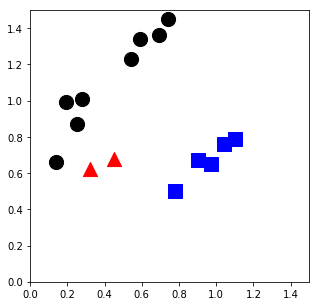

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
colors = ['b', 'r', 'k']
shape = ['s', '^', 'o']

counter = 0
for typ in d1.Type.unique():
    ax.scatter(d1[d1['Type']==typ]['rWC'], d1[d1['Type']==typ]['rCh'], s=200, marker=shape[counter], color=colors[counter])
    
    counter = counter + 1
ax.set_xlim([0, 1.5])
ax.set_ylim([0, 1.5])

#### Now, let's make a new classifier object

We'll use `KNeighborsClassifier(n_neighbors=k)` where `k` is the number of neighbors to use.



Then 'train' it using the `.fit` function on the object returned by the `KNeighborsClassifier` call.

In [22]:
inputs = ['rWC', 'rCh']
X = d1[inputs]
y = d1['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

KNNmodel = KNeighborsClassifier(n_neighbors=3)
KNNmodel.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### You can use the following function to see how your model is doing: 

`knn.predict(X) `

#### As a function of K, you and your partner should determine:  
* Testing error rate
* Training error rate 

#### Need not be quantitative but spend (1/2  - 2/3 of remaining time exploring this) 



In [29]:
rate = KNNmodel.predict(X_train) == y_train
print('Training Error Rate:', np.mean(rate))

rate = KNNmodel.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

Training Error Rate: 0.8571428571428571
Testing Error Rate: 0.875


#### With remaining time go through the cell below and look at graphs of the decision boundary vs K. 
* See if you can use the graph to determine your **testing** error rate  
* Could you also use the graph to determine your **training** error rate? (_open ended_)

Text(0,0.5,'rCh')

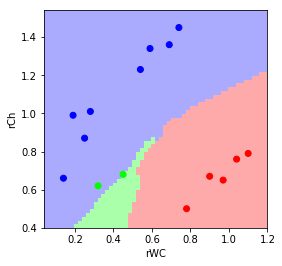

In [31]:
# additional library we will use 
from matplotlib.colors import ListedColormap

# just for convenience and similarity with sklearn tutorial
# I am going to assign our X and Y data to specific vectors
# this is not strictly needed and you could use elements df for the whole thing!
elements = d1
X=elements[['rWC','rCh']]

#this is a trick to turn our strings (type of element / class) into unique 
#numbers.  Play with this in a separate cell and make sure you know wth is 
#going on!
levels,labels=pd.factorize(elements.Type)
y=levels

#This determines levelspacing for our color map and the colors themselves
h=0.02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# in the sklearn tutorial two different weights are compared
# the decision between "uniform" and "distance" determines the probability
# weight.  "uniform" is the version presented in class, you can change to 
# distance
weights='uniform'

# I am actually refitting the KNN here. If you had a big data set you would
# not do this, but I want you to have the convenience of changing K or 
# weights here in this cell. Large training sets with many features can take 
# awhile for KNN training! 

K=5
clf = KNeighborsClassifier(n_neighbors=5, weights=weights)
clf.fit(X,y)

# Straight from the tutorial - quickly read and see if you know what these 
# things are going - if you are < 5 min until end then you should skip this part 

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = elements.rWC.min() - 0.1  , elements.rWC.max() + 0.1
y_min, y_max = elements.rCh.min() - 0.1  , elements.rCh.max() + 0.1  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h)) 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(4,4));
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
# This may be the 1st time you have seen how to color points by a 3rd vector
# In this case y ( see c=y in below statement ). This is very useful! 
plt.scatter(X.rWC, X.rCh, c=y, cmap=cmap_bold)

# Set limits and lebels 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('rWC')
plt.ylabel('rCh')